# Predicting reviews as positives or negatives

# <a id='0'>Table of Contents</a>

1. [Introduction and data set description](#intro)<br>
2. [Data processing](#pre)<br>
3. [Exploratory Data Analysis (EDA)](#explore)<br>
    3.1 [Word frequency analysis](#explore1)<br>
    3.2 [Reviews with word "good"](#explore2)<br>
    3.3 [N-grams](#explore3)<br>
    3.4.[Count-based representations](#explore4)<br>
4. [Modeling](#modeling)<br>
5. [Conclusions](#con)<br>

## 1. Introduction <a id="intro"></a>

**Business Context.** Big multimedia companies are really interested in analyzing reviews of their contents. They want to answer business questions  like: "What are the most important factors driving negative reviews?", "Have there been any large changes to customer satisfaction/reviews over time?", etc. 

Answer this kind of questions is important for making decisions to adapt, remove or create a specific content. 

**Analytical Context.** The dataset provided is a large body of reviews from critics and fans from specific contents. Each review has a label as positive or negative review. Your main task is to identify when a review can be positive or negative.

In [1]:
# Impor the libraries needed for the project
import pandas as pd # data frame management
import numpy as np # matrix management
import matplotlib.pyplot as plt # visualization
import seaborn as sns # stylize visualizations
import os # file management

In [2]:
import itertools
import nltk # imports the natural language toolkit
import plotly

# nltk.download('punkt')

In [3]:
# Increase the number of text printed
pd.set_option('display.max_colwidth', 200)

## Loading the data

In [4]:
reviews = pd.read_csv("challenge_data.csv",usecols=['text','tag'])

In [5]:
reviews.head() # Look at first rows

,text,tag
0,"in exotica everybody is watching , and what is worse , everybody knows .",pos
1,some of the gags are so carefully innocuous they're annoying .,neg
2,press junkets are a haven for control freaks .,neg
3,"then i realized he was , and i was watching it .",neg
4,uh huh .,neg


In [6]:
reviews.shape # Data frame size

(29410, 2)

In [7]:
reviews.isna().sum() # Looking for missing information

text    17
tag      8
dtype: int64

In [8]:
reviews= reviews[(reviews['text'].isna()==False)&(reviews['tag'].isna()==False)]

In [9]:
reviews.reset_index(drop=True,inplace=True) # reset index after the filtering

## Examining the data

We take a look at the first 5 rows of the dataset to see what attributes are available. These are:

* **text:** The full text of the review.
* **tag:** Label as positive or negative

There are 29410 reviews with some missing.

The amount of missing data is little so we dropped it.

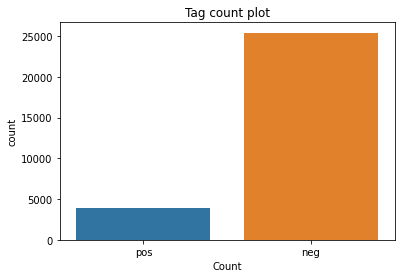

In [10]:
# plt.figure(figsize=(5,5))
sns.countplot(x='tag',data=reviews)
plt.xlabel("Count")
plt.title(f"Tag count plot") 
plt.show()

In [11]:
round(reviews.tag.value_counts()*100/reviews.shape[0],2)

neg    86.53
pos    13.47
Name: tag, dtype: float64

The tag feature it is really unbalanced, almost 87% of the data has been tag as a negative review.

Which words are more present in the reviews?

In [12]:
# Create list of reviews tokenized
review_list= []
for i in range(reviews.shape[0]):
    review= reviews.iloc[i]['text']
    review= nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review_list.append(review)

In [13]:
# It is obtained all the reviews separated as list of words
print(f"Amount of reviews: {len(review_list)}")
print(f"First review tokenized: {review_list[0]}")
print(f"Last review tokenized: {review_list[-1]}")

Amount of reviews: 29385
First review tokenized: ['in', 'exotica', 'everybody', 'is', 'watching', 'and', 'what', 'is', 'worse', 'everybody', 'knows']
Last review tokenized: ['what', 'i', 'admire', 'most', 'about', 'city', 'of', 'angels', 'is', 'its', 'overall', 'presentation']


It is necessary to calculate the frequency of the words in the reviews to see which words are more representative:

In [14]:
# Create an unique list, not a list of list, because the FreqDist function of nltk library need a list as an argument.
review_list_= list(itertools.chain(*review_list))
# Obtain frequency of the words
freq = nltk.FreqDist(review_list_)
freq

FreqDist({'the': 33136, 'a': 16738, 'and': 14810, 'of': 14596, 'to': 14365, 'is': 10567, 'in': 9459, 's': 8263, 'that': 7294, 'it': 7177, ...})

As expected the most frequent words are stop words so it is mandatory to remove them

<a href="#0"><font size="1">Back to contents</font></a>

## 2. Data processing <a id="pre"></a>

It is common to pre-process text by removing words that you have a reason to believe are uninformative; these words are called [**stop words**](https://en.wikipedia.org/wiki/Stop_words). Usually, it suffices to simply treat extremely common words as stop words.

The `nltk` library has a standard list of stopwords, which you can download by writing `nltk.download(“stopwords”)`. We can then load the stopwords package from the nltk.corpus and use it to load the stop words:

In [15]:
# Create the list of most common stopwords
stopwords= nltk.corpus.stopwords.words('english')
# List the first 10 stop words
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
# Lower case all the words in the reviews, the list of stopwords is lowercased.
reviews['text']= reviews['text'].str.lower()

In [17]:
# Create list of reviews tokenized and not matching any stop words
review_list= []
for i in range(reviews.shape[0]):
    review= reviews.iloc[i]['text']
    review= nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review= [word for word in review if word not in stopwords]
    review_list.append(review)

In [18]:
# It is obtained all the reviews separated as list of words and neither of those words are in the list of stopwords.
print(f"Amount of reviews: {len(review_list)}")
print(f"First review tokenized: {review_list[0]}")
print(f"Last review tokenized: {review_list[-1]}")

Amount of reviews: 29385
First review tokenized: ['exotica', 'everybody', 'watching', 'worse', 'everybody', 'knows']
Last review tokenized: ['admire', 'city', 'angels', 'overall', 'presentation']


In [19]:
# Create an unique list, not a list of list, because the FreqDist function of nltk library need a list as an argument.
review_list_= list(itertools.chain(*review_list))
# Obtain frequency of the words
freq = nltk.FreqDist(review_list_)
freq

FreqDist({'film': 4098, 'movie': 2930, 'one': 2583, 'like': 1728, 'even': 1245, 'time': 1118, 'good': 1098, 'would': 1022, 'much': 943, 'get': 943, ...})

In [20]:
# Frequency dictionary to dataframe
df_review = pd.DataFrame(list(freq.items()), columns= ["Word","Frequency"])
df_review= df_review.sort_values('Frequency',ascending=False)
df_review.reset_index(drop = True, inplace=True)
df_review.head()

,Word,Frequency
0,film,4098
1,movie,2930
2,one,2583
3,like,1728
4,even,1245


<a href="#0"><font size="1">Back to contents</font></a>

## 3. Exploratory Data Analysis (EDA)<a id="explore"></a>

### 3.1. Word frequency analysis<a id="explore1"></a>

### (i) All reviews

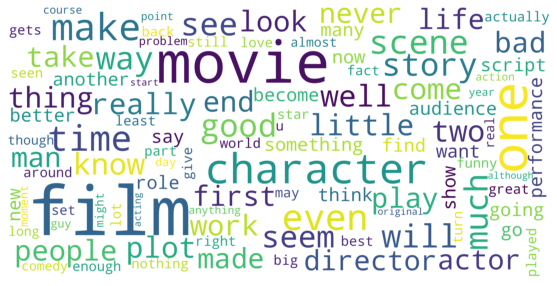

In [21]:
from wordcloud import WordCloud # Visualization

word_cloud_text = ''.join(reviews.text)
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white",\
                          scale = 10,width=800, height=400).generate(word_cloud_text)
plt.figure(figsize= (15,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

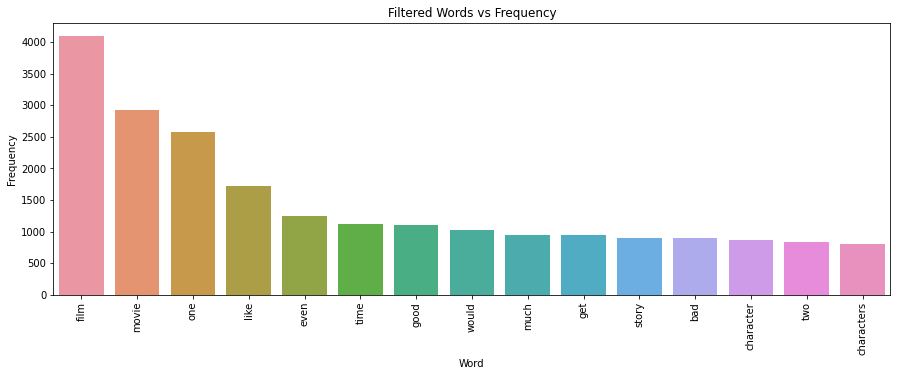

In [22]:
plt.figure(figsize= (15,5))
plot = sns.barplot(x= df_review.iloc[:15].Word, y = df_review.iloc[:15].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Filtered Words vs Frequency")
plt.show()

In [23]:
def graph_top(df,top,figsize):
    # Create list of reviews tokenized and not matching any stop words
    review_list= []
    for i in range(df.shape[0]):
        review= df.iloc[i]['text']
        review= nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
        review= [word for word in review if word not in stopwords]
        review_list.append(review)

    # Create an unique list, not a list of list, because the FreqDist function of nltk library need a list as an argument.
    review_list_= list(itertools.chain(*review_list))
    # Obtain frequency of the words
    freq = nltk.FreqDist(review_list_)
    # Frequency dictionary to dataframe
    df_review = pd.DataFrame(list(freq.items()), columns= ["Word","Frequency"])
    df_review= df_review.sort_values('Frequency',ascending=False)
    df_review.reset_index(drop = True, inplace=True)
    
    plt.figure(figsize= (figsize,5))
    plot = sns.barplot(x= df_review.iloc[:top].Word, y = df_review.iloc[:top].Frequency)
    for item in plot.get_xticklabels():
        item.set_rotation(90)
    plt.title("Filtered Words vs Frequency")
    plt.show()
    
    return df_review

### (ii) Positive reviews

In [24]:
positive = reviews[reviews['tag']=='pos']

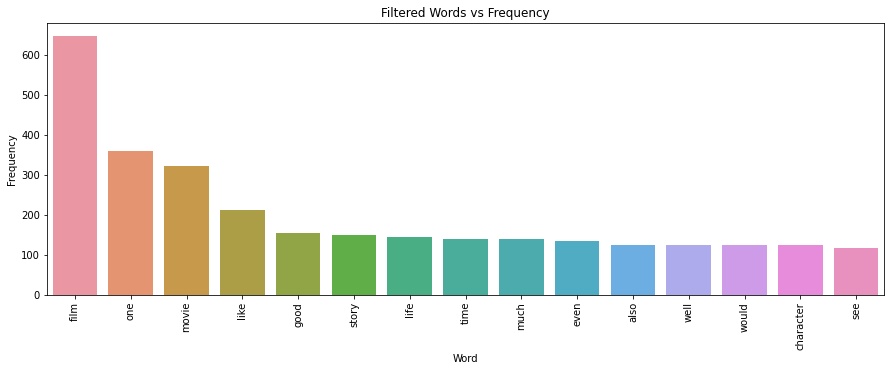

In [25]:
df_pos = graph_top(positive,15,15)

### (iii) Negative reviews

In [26]:
negative = reviews[reviews['tag']=='neg']

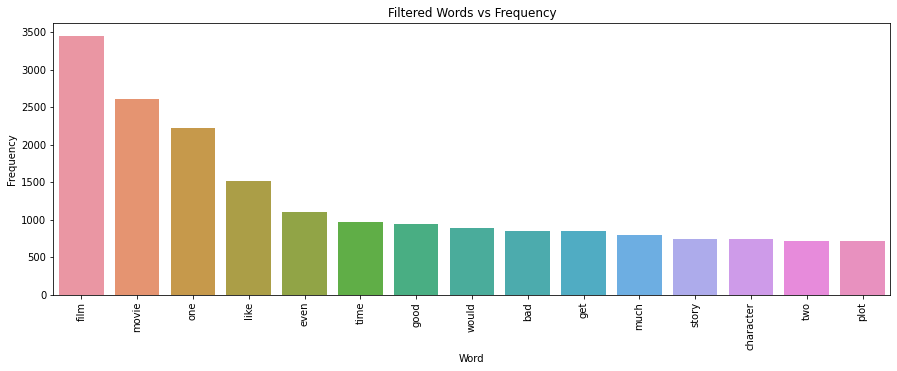

In [27]:
df_neg = graph_top(negative,15,15)

Immediately we noticed that words as: film, movie, one, like, good, story, much, time and character are in both top 15 more frequent words. 

Almost all the words showed before except by "good" and "like" are related to the movies topic. These two words are really special because they can be used in both contexts.  

So now it is important to find words that are indicative of bad reviews. That is, words that appear often in bad reviews and not in good reviews.

* Only negative

In [28]:
pos_list= df_pos.Word.tolist() # Create a list with all the positive words
neg_list= df_neg.Word.tolist() # Create a list with all the negative words
print(f"Unique words in positive reviews: {len(pos_list)}")
print(f"Unique words in negative reviews: {len(neg_list)}")

Unique words in positive reviews: 11724
Unique words in negative reviews: 25934


In [29]:
only_negative= [word for word in neg_list if word not in pos_list]
print(f"Unique words in negative reviews that are not present in positive reviews: {len(only_negative)}")

Unique words in negative reviews that are not present in positive reviews: 16663


In [30]:
# Create a column with 1 if the word is contained in only_negative list:
def create_filter(row):
    
    if row in only_negative:
        return 1
    else:
        return 0

In [31]:
df_neg['only_neg']= df_neg['Word'].apply(create_filter) # Create a column with 1 if the word is contained in only_negative list
df_neg_only= df_neg[df_neg['only_neg']==1] # Only negative words data frame

In [32]:
df_neg_only.head()

,Word,Frequency,only_neg
729,poorly,63,1
887,snake,52,1
997,nbsp,47,1
1061,carpenter,45,1
1064,blame,44,1


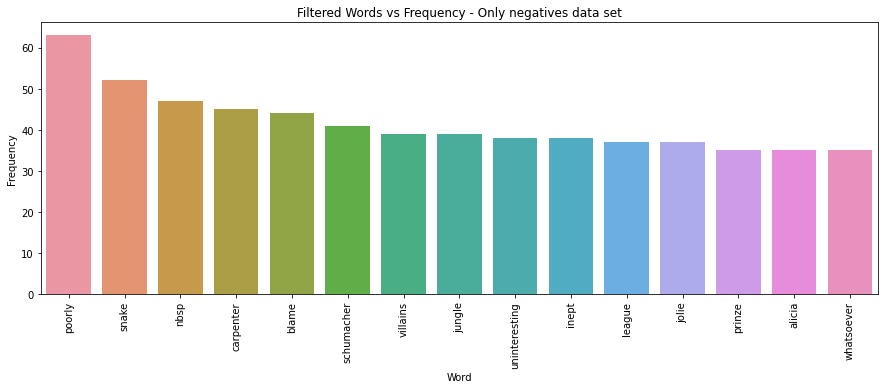

In [33]:
plt.figure(figsize= (15,5))
plot = sns.barplot(x= df_neg_only.iloc[:15].Word, y = df_neg_only.iloc[:15].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Filtered Words vs Frequency - Only negatives data set")
plt.show()

We can see clear words that reflect a negative statement as: poorly, blame, uninteresting, inept and whatsoever.

But others not as clear: snake, nbsp, carpenter, schumacher, villains, jungle, league, jolie, prinze and alicia.

* Only positive

In [34]:
only_pos= [word for word in pos_list if word not in neg_list]
print(f"Unique words in positive reviews that are not present in negative reviews: {len(only_pos)}")

Unique words in positive reviews that are not present in negative reviews: 2453


In [35]:
# Create a column with 1 if the word is contained in only_negative list:
def create_filter_pos(row):
    
    if row in only_pos:
        return 1
    else:
        return 0

In [36]:
df_pos['only_pos']= df_pos['Word'].apply(create_filter_pos) # Create a column with 1 if the word is contained in only_positive list
df_pos_only= df_pos[df_pos['only_pos']==1] # Only positive words data frame
df_pos_only.head()

,Word,Frequency,only_pos
1178,gattaca,7,1
1372,shrek,6,1
1441,lumumba,6,1
1456,maximus,6,1
1482,carver,6,1


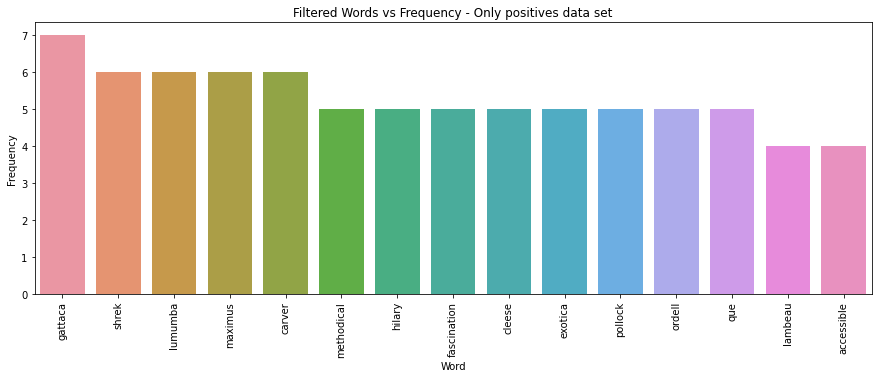

In [37]:
plt.figure(figsize= (15,5))
plot = sns.barplot(x= df_pos_only.iloc[:15].Word, y = df_pos_only.iloc[:15].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Filtered Words vs Frequency - Only positives data set")
plt.show()

For positive reviews mostly all the top words are not clear related to a positive statement. Maybe fascination and accessible.
**The frequency it is important to consider. These words are representing so little reviews. At least for negative reviews, that are the majority the frequency of the words it is larger than 35 (still a low number of reviews)**

Additionally, maybe an analysis per frequency instead of not being in the list would be more accurate and give us more insights.

* Comparing Top 100 

In [38]:
pos_list_100= df_pos.Word.tolist()[0:100] # Create a list with top 100 the positive words
neg_list_100= df_neg.Word.tolist()[0:100] # Create a list with top 100 the negative words
only_negative_100= [word for word in neg_list_100 if word not in pos_list_100]
print(f"Unique words in negative reviews that are not present in positive reviews - Top 100: {len(only_negative_100)}")

Unique words in negative reviews that are not present in positive reviews - Top 100: 20


In [39]:
# Create a column with 1 if the word is contained in only_negative_100 list:
def create_filter_100(row):
    
    if row in only_negative_100:
        return 1
    else:
        return 0

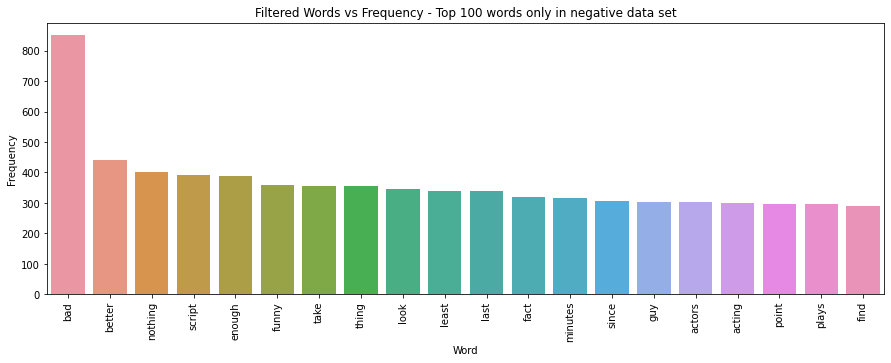

In [40]:
df_neg['only_neg_100']= df_neg['Word'].apply(create_filter_100) # Create a column with 1 if the word is contained in only_negative_100 list
df_neg_only_100= df_neg[df_neg['only_neg_100']==1] # Only negative words data frame

plt.figure(figsize= (15,5))
plot = sns.barplot(x= df_neg_only_100.Word, y = df_neg_only_100.Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Filtered Words vs Frequency - Top 100 words only in negative data set")
plt.show()

For the top 100 most common negative words that are not in the top 100 most common positive words. 

We can see clear words that reflect a negative statement as: bad, nothing, enough and least.

But others not as clear: better, script, funny, take, thing, look, last, fact, minutes, since, guy, actors, acting, point, plays and find.

<a href="#0"><font size="1">Back to contents</font></a>

### 3.2. Reviews with word "good"<a id="explore2"></a>

* Negative

In [41]:
# Show the characters before and after a specific word
n_reviews_containing_good= [each for each in negative.text if 'good' in each]
for review in n_reviews_containing_good[:10]:
    good_index= review.find("good")
    print(review[good_index-20:good_index+20].replace("\n", ""))

ed by her child why good can't fight bac
ne and looks really good and if one was 
ovie more harm than good .
mit the effects are good -- the bugs mov
isn't necessarily a good thing , since i
 like water " was a good film .
ly admire a hero so goody-two-shoes that
t there aren't many good roles available

is generally pretty good .


In [42]:
# Show the characters before and after a specific word
p_reviews_containing_good= [each for each in positive.text if 'good' in each]
for review in p_reviews_containing_good[:10]:
    good_index= review.find("good")
    print(review[good_index-20:good_index+20].replace("\n", ""))


lex than the famous goodfellas shot , bu

ope ann miller is a good but limited act
e machine is a very good piece of cinema
 as either entirely good or entirely evi
movie its extremely good acting from the
) as opposed to the good science ( scien
of movie : it looks good , it feels good
name of the greater good , not entertain


Negative: Most difficult to tell, the most clear is the word "good" after a denial of the sentence using "not". In other cases is a positive sentence but a general negative review.  

Positive: Good after adverbs, as: very, entirely, extremely, among others.

1. The first word after "good"
2. The first word after "good" that is a noun or cardinal
3. The last word before "good" that is a noun or cardinal

### The first word after "good"

In [43]:
import re # regex
import string

In [44]:
# Data frame with only the reviews that include the word "good"
negative_good= negative[negative.text.str.contains("good\s",regex=True)==True].reset_index(drop=True)

In [45]:
# Function to determine the word after good
def word_after(row):
    post = re.findall(r'good.*', row)
    if (len(post) > 0):
        temp = re.split(r'\s',post[0])
        if (len(temp) > 1):
            return(temp[1])
        else:
            return('')
    else:
        return('')

In [46]:
negative_good["AfterGood"] = negative_good["text"].apply(word_after).apply(lambda x: x.strip(string.punctuation))

In [47]:
negative_good['AfterGood'].value_counts().head(10)

               163
and             23
as              21
movie           21
thing           19
in              18
performance     16
time            15
reason          14
film            13
Name: AfterGood, dtype: int64

We noticed that blank spaces and other words that are not really significant as "and","as","in", among others, represent the most frequent words. So it is important to filter words different to nouns.  

### The first word after "good" that is a noun or cardinal

In [48]:
# Use POS tagging to find the first word following "good" that has an interesting POS tag.
# CD cardinal and NN noun

def first_noun_cardinal(row):
    sentence = re.findall(r'good.*', row)
    words = nltk.word_tokenize(sentence[0].strip(string.punctuation))
    for word, tag in nltk.pos_tag(words):
        if (tag == "CD") or (tag == "NN"):
            return word

In [49]:
negative_good["FirstNNorCD"] = negative_good["text"].apply(first_noun_cardinal)

In [50]:
negative_good["FirstNNorCD"].value_counts().head(10)

movie          32
film           28
thing          21
performance    20
time           16
reason         15
job            14
one            14
idea           13
friend         12
Name: FirstNNorCD, dtype: int64

### The last word before "good" that is a noun or cardinal

In [51]:
# Tokenize the reviews
token_reviews = nltk.word_tokenize(" ".join(negative_good['text']))
# Create list of reviews tokenized and not matching any stop words
neg_reviews_clean = [word for word in token_reviews if word not in stopwords and len(word)>2]

In [52]:
from nltk import pos_tag
from nltk.util import ngrams

In [53]:
# Bigram form each word
bigram = list(ngrams(neg_reviews_clean, 2))
# Get the postag only if good is the second element of the tuple
bigram = [pos_tag(word)[0] for word in bigram if word[1]=='good']
# Filter out using NN or CD
bigram =[word for word in bigram if word[1] in ('NN','CD')]

In [54]:
pd.Series(bigram).value_counts().head(10)

(one, CD)          24
(look, NN)         17
(movie, NN)        12
(film, NN)         11
(nothing, NN)       7
(couple, NN)        5
(two, CD)           4
(something, NN)     3
(character, NN)     3
(story, NN)         3
dtype: int64

Using the bigrams help to analyze the tags of the majority of the data, the advantage of creating a column is that facilitates to analyze more rapidly the data. Both methods can be combined in order to obtain more information.

Mostly all the more frequent last words before "good" are: one, look, movie, film, nothing and couple. From these, movie and film are also in the first noun after good. 

<a href="#0"><font size="1">Back to contents</font></a>

### 3.3. N-grams<a id="explore3"></a>

Since 1-grams are insufficient to understand the significance of certain words in our text, it is natural to consider blocks of words, or **n-grams**.

The simplest version of the n-gram model, for $n > 1$, is the **bigram** model, which looks at pairs of consecutive words. For example, the sentence "The quick brown fox jumps over the lazy dog" would have tokens "the quick", "quick brown",..., "lazy dog". The following image explains this concept:

<img src="ngrams.png" alt="ngrams" width="500"/>

This has obvious advantages and disadvantages over looking at words individually:

1. This retains the structure of the overall document, and
2. It paves the way for analyzing words in contex; however,
3. The dimension is vastly larger

**It is often prudent to start by extracting as much value out of 1-grams as possible, before working our way up to more complex structures.**

In [55]:
from collections import Counter
from nltk.util import ngrams
# To determine the top n-grams
def top_k_ngrams(word_tokens,n,k):
    
    # Getting them as n-grams
    n_gram_list = list(ngrams(word_tokens, n))

    # Getting each n-gram as a separate string
    n_gram_strings = [' '.join(each) for each in n_gram_list]
    
    n_gram_counter = Counter(n_gram_strings)
    most_common_k = n_gram_counter.most_common(k)
    print(most_common_k)

* Negative reviews

In [56]:
# Getting a single string
reviews = negative['text']
all_reviews_text = ' '.join(reviews)

# Splitting them into tokens
word_tokens = nltk.word_tokenize(all_reviews_text)

# Calling the function for top k
print("Top 10 most frequent words:")
print(top_k_ngrams(word_tokens, 1, 10))
print("Top 10 most frequent bigrams:")
print(top_k_ngrams(word_tokens, 2, 10))
print("Top 10 most frequent trigrams:")
print(top_k_ngrams(word_tokens, 3, 10))

Top 10 most frequent words:
[(',', 28053), ('the', 27903), ('.', 25769), ('a', 14237), ('and', 12346), ('to', 12255), ('of', 12253), ('is', 9295), ('in', 7961), ('``', 7318)]
None
Top 10 most frequent bigrams:
[('of the', 2994), (', and', 2962), ('. the', 2629), ('in the', 2120), (', but', 2029), (', the', 1676), ('the film', 1592), ('. .', 1488), ("it 's", 1465), (') ,', 1269)]
None
Top 10 most frequent trigrams:
[('. . .', 861), (". it 's", 462), ('one of the', 326), ('of the film', 318), (', and the', 304), (", it 's", 277), ('. the film', 228), ('in the film', 223), (', but it', 209), ('. this is', 190)]
None


It is mandatory to clean, because the n-grams are filled by stopwords and punctuation or '.

In [57]:
# Removing the most basic stop words from the ntlk corpus and including only those
# words with character size above 2 so as to remove punctuations.
# But, this could be extended to remove further high and low frequency stop words

def top_n_grams(df,n,k):
    # Getting a single string
    reviews = df['text']
    all_reviews_text = ' '.join(reviews)

    # Splitting them into tokens
    word_tokens = nltk.word_tokenize(all_reviews_text)

    # Removing the stopwords
    word_tokens_clean = [each for each in word_tokens if each not in stopwords and len(each) > 2]

    # Calling the function for top k
    top_k_ngrams(word_tokens_clean, n, k)

In [58]:
top_n_grams(negative,2,10)

[('special effects', 164), ("n't even", 120), ("would n't", 98), ('new york', 97), ("film n't", 95), ("could n't", 94), ('even though', 87), ("n't know", 84), ('high school', 79), ("movie n't", 78)]


In [59]:
top_n_grams(negative,3,10)

[('know last summer', 33), ('wild wild west', 20), ('new york city', 19), ("'ve ever seen", 18), ('tommy lee jones', 17), ("n't make sense", 14), ('saturday night live', 13), ('jay silent bob', 13), ("n't get wrong", 12), ("could n't help", 12)]


* Positive reviews

In [60]:
top_n_grams(positive,2,10)

[('special effects', 22), ("n't know", 21), ('new york', 19), ('even though', 16), ('star wars', 16), ('star trek', 15), ('pulp fiction', 15), ('one best', 13), ("'ve seen", 13), ('high school', 13)]


In [61]:
top_n_grams(positive,3,10)

[('saving private ryan', 6), ('new york city', 5), ('jay silent bob', 4), ('movie ever made', 4), ('crouching tiger hidden', 3), ('tiger hidden dragon', 3), ('tommy lee jones', 3), ('star trek insurrection', 3), ('blair witch project', 3), ('waking ned devine', 3)]


#### Bigrams

The contraction "n't" appears 6 times in the top 10. Also New York it is really common, maybe the most frequent location of the movies that were reviewed. Special effects is the most frequent bigram in negative and positive reviews, so it is not a good indicator for classifying a movie.

#### Trigrams

In the trigrams we encounter some of the movies names and actors. This values could be higher if we assume there are orthographic errors.

<a href="#0"><font size="1">Back to contents</font></a>

### 3.4. Count-based representations<a id="explore4"></a>

N-grams fall under a broader category of techniques otherwise known as [**count-based representations**](https://scikit-learn.org/stable/modules/feature_extraction.html#common-vectorizer-usage). These are techniques to analyze documents by indicating how frequently certain types of structures occur throughout.

Let's start with 1-grams (words). The simplest type of information would be whether a particular word occurs in particular review. This leads to **review co-occurrence matrice**, where the $(W, X)$ entry of the review matrix is set to 1 if word $W$ occurs in the review $X$, and 0 otherwise.

There are many variants of this. In lieu of the fact that we are looking for count-based representations of our reviews, one natural variable is the following: the $(W, X)$ entry of the review matrix equals the number of times that word $W$ occurs in the review $X$, rather than merely being a binary variable.

In [62]:
reviews = pd.read_csv("challenge_data.csv",usecols=['text','tag'])
reviews= reviews[(reviews['text'].isna()==False)&(reviews['tag'].isna()==False)]
reviews.reset_index(drop=True,inplace=True) # reset index after the filtering
type(reviews.text)

pandas.core.series.Series

In [63]:
# The following code creates a review matrix.
from sklearn.feature_extraction.text import CountVectorizer 
# Convert a collection of text documents to a matrix of token counts
# This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.
# If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature
# selection then the number of features will be equal to the vocabulary size found by analyzing the data.

vec = CountVectorizer()
X = vec.fit_transform(reviews.text)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df.head()

,00,000,007,00s,03,04,05,05425,10,100,...,zoot,zorro,zsigmond,zucker,zuko,zulu,zurg,zwick,zwigoff,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


28500 columns representing unique words from the text reviews.

In [64]:
reviews[reviews.text.str.contains("zzzzzzz\s",regex=True)==True].reset_index(drop=True)

,text,tag
0,"anyway , fourteen years go by and . . . arrgh , well , you know the rest . . . swish-swish-zzzzzzz !",neg


<a href="#0"><font size="1">Back to contents</font></a>

## 4. Modeling <a id="modeling"></a>

In [65]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc # Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_auc_score 

from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, GlobalMaxPooling1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
try:
    tf.set_random_seed(1337) # set the random seed for reproducibility
except:
    tf.random.set_seed(1337) # NOTE: Newer version of tensorflow uses tf.random.set_seed
np.random.seed(1337)  #       instead of tf.set_random_seed

In [67]:
reviews = pd.read_csv("challenge_data.csv",usecols=['text','tag'])
reviews= reviews[(reviews['text'].isna()==False)&(reviews['tag'].isna()==False)]
reviews.reset_index(drop=True,inplace=True) # reset index after the filtering
# reviews['tag']= reviews['tag'].map({"pos":1,"neg":0}) # mapping the tag column into data that keras will expect

In [68]:
reviews['tag'].value_counts()

neg    25428
pos     3957
Name: tag, dtype: int64

Balancing the data:

In [69]:
df= reviews[reviews['tag']=='neg'].sample(4000,random_state=0) # Create 4000 records dataframe with negative reviews
combined= pd.concat([df,positive]).reset_index(drop=True) # Concatenate the data frames to balance the data

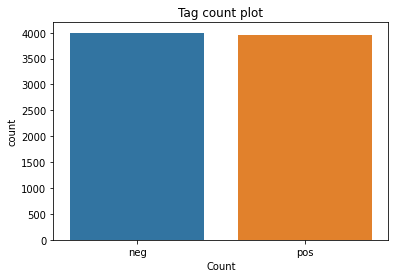

In [70]:
# plt.figure(figsize=(5,5))
sns.countplot(x='tag',data=combined)
plt.xlabel("Count")
plt.title(f"Tag count plot") 
plt.show()

Remove words that are really frequent in both reviews:

In [71]:
words_in_both_top_lists = [word for word in neg_list_100 if word in pos_list_100]

In [72]:
# Create list of reviews tokenized, not matching any stop words, and not match words_in_both_top_lists
review_list= []
for i in range(combined.shape[0]):
    review= combined.iloc[i]['text']
    review= nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review)
    review= [word for word in review if word not in stopwords and len(word) > 2]
    review= [word for word in review if word not in words_in_both_top_lists]
    review_list.append(review)

In [73]:
# reviews['text']= pd.Series(review_list)
combined['text']= pd.Series(review_list)

In [74]:
combined['tag']= combined['tag'].map({"pos":1,"neg":0}) # mapping the tag column into data that keras will expect

In [75]:
# Split the dataset taking into account the unbalanced
X_train, X_test, y_train, y_test = train_test_split(combined['text'], combined['tag'],test_size=0.20, random_state=42)

In [76]:
# Split the dataset taking into account the unbalanced
# X_train, X_test, y_train, y_test = train_test_split(reviews['text'], reviews['tag'],
#                                                    stratify= reviews['tag'], test_size=0.20, random_state=42)

#### Tokenizing texts

Keras comes with its own functions to preprocess text, including a [tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) (a mapping from each word in our corpus to a unique integer). Unlike the `CountVectorizer` from `sklearn`, which produces sparse matrices, `keras` often expects to work with sequences representing only the words that occur in a text. To prepare text before feeding it into a neural network, we usually:

1. Create a [tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer).
2. [Create sequences](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#texts_to_sequences) from our text (each text becomes a list of integers, based on the tokenizer mapping, instead of words)
3. [Pad or truncate](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences) each sequence to a fixed length (very short texts get `0`s added to them, while very long ones are truncated).

The tokenizer has a configurable word cap, so it will only consider the $n$ most common words in the corpus, ignoring very rare words.

In [77]:
from collections import Counter
count_words = Counter()
words_per_review = []
for words in X_train:
    words = [word for word in words if word not in stopwords and len(word) > 2] # remove stop words and to remove punctuations
    count_words.update(words)
    words_per_review.append(len(words))
count_words.most_common()[0:10] # 10 most frequent words

[('bad', 171),
 ('better', 97),
 ('performance', 92),
 ('take', 91),
 ('original', 84),
 ('thing', 82),
 ('fact', 80),
 ('although', 80),
 ('look', 80),
 ('young', 79)]

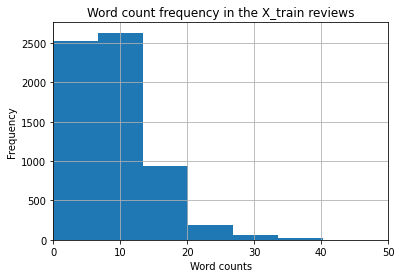

In [78]:
word_count_df = pd.Series(words_per_review).to_frame().rename(columns={0:'Word Count'})
word_count_df.hist()
plt.title('Word count frequency in the X_train reviews')
plt.ylabel('Frequency')
plt.xlabel('Word counts')
plt.xlim(0,50)
plt.show()

In [79]:
word_count_df.quantile(q=0.8)

Word Count    13.0
Name: 0.8, dtype: float64

80% of the data is below a count frequency of 13 times per word.

In [80]:
# Total unique words, 
pd.Series(count_words.most_common()).nunique()*0.8

11665.6

Given the results above, we create a tokenizer using only the top 24,400 most frequent words in our corpus (which corresponds to roughly 80% of the words): 

In [81]:
tokenizer = Tokenizer(num_words=11000) #We create the tokenizer using only top 24400 words
tokenizer.fit_on_texts(X_train)  #Then, we create the text->indices mapping. 

The tokenizer gives a values for each word. Example:

In [94]:
tokenizer.texts_to_sequences(['feel']) # From text to numbers

[[101]]

In [83]:
tokenizer.sequences_to_texts([[20, 19, 324, 86, 124, 5315, 1137, 23070]]) # From numbers to text

['plays family truly house gives miko watched']

Text reviews lenght, quantile 80%, 80% of the data is below a lenght count of 165.

In [84]:
reviews.text.apply(lambda x: len(x)).quantile(q=0.8)

165.0

Use the tokenizer to transform the texts in our test and train data to sequences. Then, use the `pad_sequences` function to pad/truncate these sequences to length 165 (the 80th percentile of text lengths). The resulting arrays are the `train_sequences` and `test_sequences`.

In [85]:
X_train_seq = tokenizer.texts_to_sequences(X_train) # Transform texts to sequences for the train
X_test_seq = tokenizer.texts_to_sequences(X_test) # Transform texts to sequences for the test

train_sequences = pad_sequences(X_train_seq, maxlen= 165) # Truncate the train arrays to a len of 116
test_sequences = pad_sequences(X_test_seq, maxlen= 165) # Truncate the test arrays to a len of 116

print(len(train_sequences[0])) # Verification of the truncated sequences
print(len(train_sequences[1]))  

165
165


### 4.1. Benchmark 

As a benchmark we will use a model that predict every review as negative. Do to the unbalance of the dataset this model will perform better than tossing a coin.

In [86]:
# Accuracy score for the test set
accuracy_score(y_test, np.zeros(len(test_sequences)))

0.510678391959799

In [87]:
# Confusion matrix
confusion_matrix(y_test, np.zeros(len(test_sequences)))

array([[813,   0],
       [779,   0]], dtype=int64)

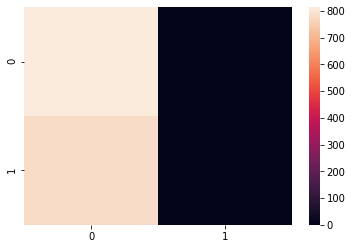

In [88]:
ax = sns.heatmap(confusion_matrix(y_test, np.zeros(len(test_sequences))))
plt.show()

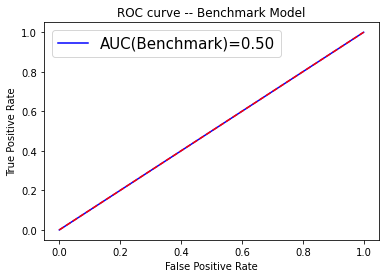

In [89]:
fpr, tpr, _ = roc_curve(y_test, np.zeros(len(test_sequences)))
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(Benchmark)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- Benchmark Model");

### 4.2. Neural network model

Now that we have preprocessed the text, let's create a basic neural network to train on our data. We'll use an embedding layer which performs [one-hot encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) on our word sequences, two fully connected ("dense") layers, and an output layer with 5 neurons to represent the 5 possible star ratings.

Before we train a `keras` model, there is an additional `compile` step where we define what loss function and optimizer to use, and what metrics to output. Then we can train the model using the `fit` function. All of this is shown below.

Note the `validation_split=0.2` argument which tells Keras to train on only 80% of the training data and tune the model on the remaining 20%, which we call the validation set. You can see the accuracy and loss for both the training and validation set in the output for each epoch:

In [95]:
model = Sequential()
model.add(Embedding(11000, 128, input_length=165))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(5, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 165, 128)          1408000   
_________________________________________________________________
dense (Dense)                (None, 165, 128)          16512     
_________________________________________________________________
dense_1 (Dense)              (None, 165, 128)          16512     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 1,441,669
Trainable params: 1,441,669
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.fit(train_sequences, y_train, validation_split=0.2, epochs=6) # 20% of the train set used for validation

Epoch 1/6
160/160 [==============================] - 5s 27ms/step - loss: 0.9496 - accuracy: 0.5017 - val_loss: 0.6780 - val_accuracy: 0.6033
Epoch 2/6
160/160 [==============================] - 4s 25ms/step - loss: 0.6212 - accuracy: 0.6958 - val_loss: 0.6847 - val_accuracy: 0.6159
Epoch 3/6
160/160 [==============================] - 4s 26ms/step - loss: 0.3436 - accuracy: 0.8724 - val_loss: 0.8701 - val_accuracy: 0.5978
Epoch 4/6
160/160 [==============================] - 5s 29ms/step - loss: 0.1512 - accuracy: 0.9504 - val_loss: 1.2280 - val_accuracy: 0.5892
Epoch 5/6
160/160 [==============================] - 4s 26ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 1.3652 - val_accuracy: 0.5986
Epoch 6/6
160/160 [==============================] - 4s 25ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 1.5895 - val_accuracy: 0.5852


In [98]:
# Method predict classes with the truncated test data
predictions = np.argmax(model.predict(test_sequences), axis=-1)

In [99]:
# Accuracy score for the test set
accuracy_score(y_test, predictions)

0.5973618090452262

In [100]:
# Confusion matrix
confusion_matrix(y_test, predictions)

array([[458, 355],
       [286, 493]], dtype=int64)

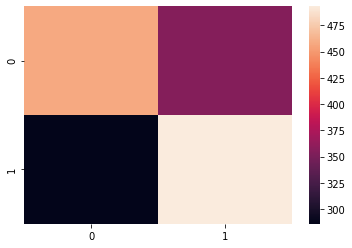

In [101]:
ax = sns.heatmap(confusion_matrix(y_test, predictions))
plt.show()

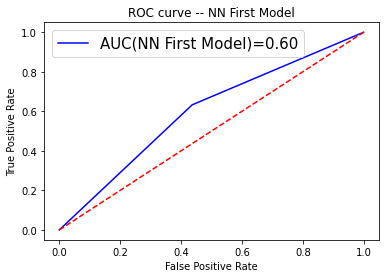

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(model.predict(test_sequences), axis=-1))
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(NN First Model)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- NN First Model");

#### Experimenting with different regularization strategies

There are many different ways to mitigate overfitting in a neural network, **past model**, collectively known as *regularization* techniques. One common regularization technique is called [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout). In this regularization method, a set of neurons is randomly selected at each training step to be completely ignored. This is done so that the neurons in our network do not rely strongly on their neighboring neurons and we avoid the creation of ["co-adaptations"](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) that do not generalize well to unseen data. This making the model more robust and less prone to overffiting.

You can create dropouts in `keras` by adding a layer named `Dropout(p)`, where `p` is the probability of dropping neurons in the previous layer. For example, the following model would implement dropout by removing roughly 20% percent of the outputs of the embedding layer at each training step:

In [103]:
model2 = Sequential()
model2.add(Embedding(11000, 128, input_length=165))
model2.add(Dropout(0.2)) # --------------------------->Dropout layer will affect the output of previous layer.
model2.add(Dense(128, activation='relu')) 
model2.add(Dense(128, activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(5, activation='sigmoid'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(train_sequences, y_train, validation_split=0.2, epochs=6)

Epoch 1/6
160/160 [==============================] - 6s 34ms/step - loss: 0.9198 - accuracy: 0.4996 - val_loss: 0.6838 - val_accuracy: 0.5727
Epoch 2/6
160/160 [==============================] - 5s 33ms/step - loss: 0.6409 - accuracy: 0.6714 - val_loss: 0.6809 - val_accuracy: 0.5829
Epoch 3/6
160/160 [==============================] - 6s 35ms/step - loss: 0.4208 - accuracy: 0.8341 - val_loss: 0.8106 - val_accuracy: 0.5892
Epoch 4/6
160/160 [==============================] - 6s 35ms/step - loss: 0.2289 - accuracy: 0.9156 - val_loss: 1.0387 - val_accuracy: 0.6119
Epoch 5/6
160/160 [==============================] - 6s 34ms/step - loss: 0.1153 - accuracy: 0.9594 - val_loss: 1.3108 - val_accuracy: 0.5954
Epoch 6/6
160/160 [==============================] - 6s 35ms/step - loss: 0.0742 - accuracy: 0.9730 - val_loss: 1.5546 - val_accuracy: 0.5962


In [104]:
# Accuracy score for the test set
accuracy_score(y_test, np.argmax(model2.predict(test_sequences), axis=-1))

0.6136934673366834

In [107]:
# Confusion matrix
confusion_matrix(y_test, np.argmax(model2.predict(test_sequences), axis=-1))

array([[478, 335],
       [280, 499]], dtype=int64)

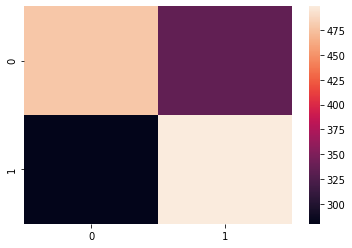

In [108]:
ax = sns.heatmap(confusion_matrix(y_test, np.argmax(model2.predict(test_sequences), axis=-1)))
plt.show()

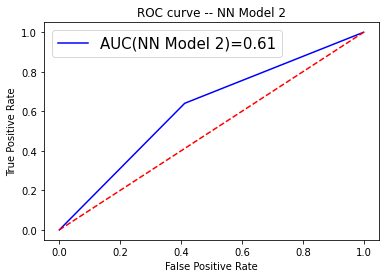

In [141]:
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(model2.predict(test_sequences), axis=-1))
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(NN Model 2)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- NN Model 2");

Keras allows to add [L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l1), [L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l2), or [L1 and L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/l1_l2) combined regularizers on individual layers by passing in the `kernel_regularizer`, `bias_regularizer` or `activity_regularizer` arguments. In neural networks, these regularizers work by penalizing the loss function in different ways, based on the number of weights or the size of the weights.

* kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
* bias_regularizer: Regularizer to apply a penalty on the layer's bias
* activity_regularizer: Regularizer to apply a penalty on the layer's output

In [109]:
model3 = Sequential()
model3.add(Embedding(11000, 128, input_length=165))
model3.add(Dense(units=128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                 bias_regularizer=regularizers.l2(1e-4),
                 activity_regularizer=regularizers.l2(1e-5)))
model3.add(Dropout(0.2)) # --------------------------->Dropout layer will affect the output of previous layer.
model3.add(Dense(units=128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                 bias_regularizer=regularizers.l2(1e-4),
                 activity_regularizer=regularizers.l2(1e-5)))
model3.add(Dropout(0.2)) # --------------------------->Dropout layer will affect the output of previous layer.
model3.add(Dense(units=128, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                 bias_regularizer=regularizers.l2(1e-4),
                 activity_regularizer=regularizers.l2(1e-5)))
model3.add(GlobalMaxPooling1D())
model3.add(Dense(5, activation='sigmoid'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(train_sequences, y_train, validation_split=0.2, epochs=6)

Epoch 1/6
160/160 [==============================] - 11s 59ms/step - loss: 1.0030 - accuracy: 0.4685 - val_loss: 0.8059 - val_accuracy: 0.5098
Epoch 2/6
160/160 [==============================] - 9s 53ms/step - loss: 0.7576 - accuracy: 0.4916 - val_loss: 0.7749 - val_accuracy: 0.4933
Epoch 3/6
160/160 [==============================] - 9s 55ms/step - loss: 0.7418 - accuracy: 0.4907 - val_loss: 0.7675 - val_accuracy: 0.4933
Epoch 4/6
160/160 [==============================] - 9s 59ms/step - loss: 0.7327 - accuracy: 0.5122 - val_loss: 0.7612 - val_accuracy: 0.5067
Epoch 5/6
160/160 [==============================] - 10s 62ms/step - loss: 0.7297 - accuracy: 0.4703 - val_loss: 0.7361 - val_accuracy: 0.5224
Epoch 6/6
160/160 [==============================] - 9s 56ms/step - loss: 0.7114 - accuracy: 0.5337 - val_loss: 0.7301 - val_accuracy: 0.5389


In [110]:
# Accuracy score for the test set
accuracy_score(y_test, np.argmax(model3.predict(test_sequences), axis=-1))

0.5508793969849246

In [111]:
# Confusion matrix
confusion_matrix(y_test, np.argmax(model3.predict(test_sequences), axis=-1))

array([[354, 459],
       [256, 523]], dtype=int64)

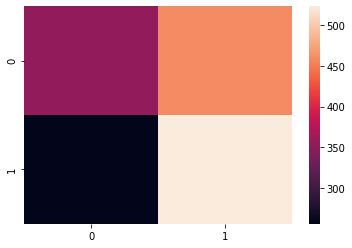

In [112]:
ax = sns.heatmap(confusion_matrix(y_test, np.argmax(model3.predict(test_sequences), axis=-1)))
plt.show()

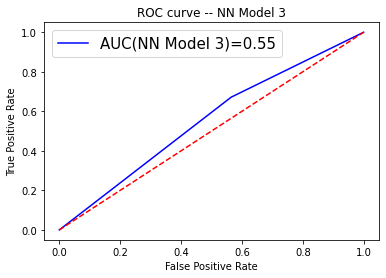

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(model3.predict(test_sequences), axis=-1) )
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(NN Model 3)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- NN Model 3");

#### Regularization through early stopping

Another form of regularization is to end training early if validation loss starts increasing. (This is similar to the validation curves we used when constructing classification models). Although the network will not have found an optimal function in the training data, the looser function that it has found will likely be more generalizable.

Keras also allows you to easily do this automatically via an [`EarlyStopping` callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [119]:
model4 = Sequential()
model4.add(Embedding(11000, 128, input_length=165))
model4.add(Dropout(0.2)) # --------------------------->Dropout layer will affect the output of previous layer.
model4.add(Dense(128, activation='relu')) 
model4.add(Dense(128, activation='relu'))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(5, activation='sigmoid'))
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(train_sequences, y_train, validation_split=0.2, epochs=6,callbacks=[EarlyStopping(monitor='val_loss', mode='min')])

Epoch 1/6
160/160 [==============================] - 6s 35ms/step - loss: 0.9778 - accuracy: 0.4835 - val_loss: 0.6849 - val_accuracy: 0.5852
Epoch 2/6
160/160 [==============================] - 5s 34ms/step - loss: 0.6514 - accuracy: 0.6518 - val_loss: 0.6821 - val_accuracy: 0.6033
Epoch 3/6
160/160 [==============================] - 6s 36ms/step - loss: 0.4146 - accuracy: 0.8412 - val_loss: 0.8134 - val_accuracy: 0.6033


In [120]:
# Accuracy score for the test set
accuracy_score(y_test, np.argmax(model4.predict(test_sequences), axis=-1))

0.6048994974874372

In [121]:
# Confusion matrix
confusion_matrix(y_test, np.argmax(model4.predict(test_sequences), axis=-1))

array([[527, 286],
       [343, 436]], dtype=int64)

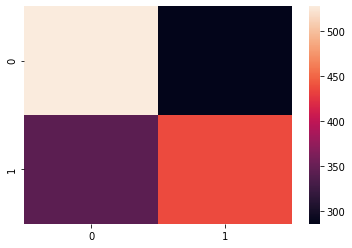

In [122]:
ax = sns.heatmap(confusion_matrix(y_test, np.argmax(model4.predict(test_sequences), axis=-1)))
plt.show()

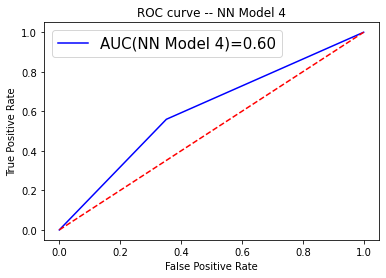

In [143]:
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(model4.predict(test_sequences), axis=-1))
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(NN Model 4)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- NN Model 4");

In [128]:
model5 = Sequential()
model5.add(Embedding(11000, 128, input_length=165))
model5.add(Dropout(0.2)) # --------------------------->Dropout layer will affect the output of previous layer.
model5.add(Dense(128, activation='relu')) 
model5.add(GlobalMaxPooling1D())
model5.add(Dense(64, activation='relu'))
model5.add(Dense(2, activation='sigmoid'))
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.fit(train_sequences, y_train, validation_split=0.2, epochs=6)

Epoch 1/6
160/160 [==============================] - 5s 29ms/step - loss: 0.6912 - accuracy: 0.5239 - val_loss: 0.6784 - val_accuracy: 0.5695
Epoch 2/6
160/160 [==============================] - 4s 27ms/step - loss: 0.5885 - accuracy: 0.7099 - val_loss: 0.6781 - val_accuracy: 0.6096
Epoch 3/6
160/160 [==============================] - 4s 28ms/step - loss: 0.3009 - accuracy: 0.8841 - val_loss: 0.8847 - val_accuracy: 0.6182
Epoch 4/6
160/160 [==============================] - 4s 28ms/step - loss: 0.1158 - accuracy: 0.9613 - val_loss: 1.1773 - val_accuracy: 0.6229
Epoch 5/6
160/160 [==============================] - 5s 29ms/step - loss: 0.0536 - accuracy: 0.9825 - val_loss: 1.4021 - val_accuracy: 0.6072
Epoch 6/6
160/160 [==============================] - 5s 28ms/step - loss: 0.0375 - accuracy: 0.9869 - val_loss: 1.5817 - val_accuracy: 0.6104


In [129]:
# Accuracy score for the test set
accuracy_score(y_test, np.argmax(model5.predict(test_sequences), axis=-1))

0.6074120603015075

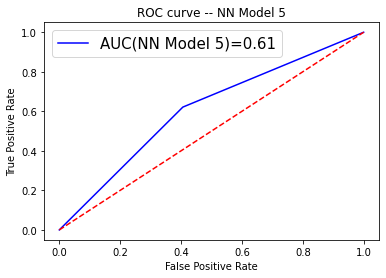

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, np.argmax(model5.predict(test_sequences), axis=-1))
auc_baseline = auc(fpr, tpr)

plt.plot(fpr, tpr, "b-", label="AUC(NN Model 5)={:2.2f}".format(auc_baseline))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(fontsize=15)
plt.plot([0,1], [0,1], "r--")
plt.title("ROC curve -- NN Model 5");

### Saving best model:

Using keras

In [135]:
# Save model 2
model2.save('best_NN_for_binary_classification.h5')

In [ ]:
# Load model 2
model2 = keras.models.load_model('best_NN_for_binary_classification.h5')

In [130]:
# !pip install joblib

In [132]:
from joblib import dump, load # For non keras models

In [136]:
# dump(model2,'best_NN_for_binary_classification.joblib')

<a href="#0"><font size="1">Back to contents</font></a>

## 5. Conclusions <a id="con"></a>

**Many insights of the data where found:**

1. Unbalanced tagged data.
2. Many words were repeated in both positive and negative reviews. In fact from the 100 most frequent words for each type of review (pos and neg) only 20 words were exclusive for the negative reviews.
3. Different words were in both kinds of reviews, even though their main root was more connected to one or other review. Example: "good" and "like" related to positive statements. In this case analyzing by n-grams helped a lot to understand the reasons and the words more connected to change their meanings.  
4. For N-grams analysis. The contraction "n't" appeared 6 times in the top 10 for negative reviews. Also New York was really common, maybe the most frequent location of the movies that were reviewed. Special effects was the most frequent bigram in negative and positive reviews, so was not a good indicator for classifying a movie. 

**Modeling:**

1. The best two neural networks trained were the model 2 and the model 5, drop out as a regularization technique was the best way to improve a little bit the model. For regularization L1, L2 and  L1L2 combined I think that more data is needed. In general more data would help a lot to the training. Early stopping of the training also help because between epoch 3 to 5 the loss was low and the validation set had a good accuracy.
2. All the models were better than the benchmark, that consisted in toss a coin and classify through that. 
3. For the modeling the pre processing techniques and the EDA processes done before help a lot in understanding the data and train the models. But the training of the model with the unbalanced data was really difficult, the models did not classify well even though the separating of the data for training and testing was done using stratified sampling (this helped to preserver the proportion of the training in the testing). Also many trials were run but the models did not performed better than the benchmark.(In this notebook does not appear the run models - But the html file has a 2 models run before)  

**Next steps:**

1. For improving the models a data augmentation of the positive reviews could help a lot. Also trying to obtain more information would be helpful. Not only more reviews, dates and related topic as additional columns could help a lot. 